# $\Psi^\text{0}$

$\phi_l(|\vec{r}|)=\sum\limits_{n=1}^{n_l}c^{(l)}_n|\vec{r}|^{(l)}e^{-\gamma^{(l)}_n\vec{r}^2}$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

def psiL(r,l,widths,coeffs):
    psi = np.array([coeffs[n]*r**l*np.exp(-widths[n]*r**2) 
                    for n in range(min(len(coeffs),len(widths))) ])
    return np.sum(psi)

deut_expansion = [ float(li) for li in open('COEFF') ]
clean_wrels = [ float(li) for li in open('w0.dat') ]

determine $c_1,\ldots,c_{n_s},c_{n_s+1},\ldots,c_{n_s+n_d}$ from
$\texttt{inen_b}$

In [21]:
inen = [line for line in open('inen_b')]
Sindices = np.nonzero(np.array(inen[6].split()).astype(int))
Dindices = np.nonzero(np.array(inen[8].split()).astype(int))
Swidths = np.take(clean_wrels,Sindices)[0]
Dwidths = np.take(clean_wrels,Dindices)[0]

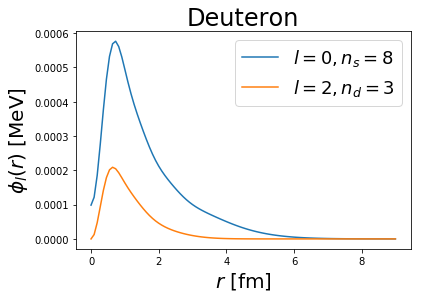

In [22]:
rspace = np.linspace(0,9,100)

wfktS = [ psiL(rr,0,Swidths,deut_expansion) for rr in rspace ]
wfktD = [ psiL(rr,2,Dwidths,deut_expansion[len(Swidths):]) for rr in rspace ]

plt.subplot(111)
t = plt.title(r'Deuteron', fontsize=24)
plt.xlabel(r'$r$ [fm]', fontsize=20)
plt.ylabel(r'$\phi_l(r)$ [MeV]', fontsize=20)

plt.plot(rspace, wfktS, label='$l=0, n_s=%d$'%len(Swidths))
plt.plot(rspace, wfktD, label='$l=2, n_d=%d$'%len(Dwidths))

plt.legend(loc='best', numpoints=1, fontsize=18)
plt.show()

# $\Psi^\text{LIT}$

$\phi_l(|\vec{r}|)=\sum\limits_{n=1}^{n_l}c^{(l)}_n|\vec{r}|^{(l)}e^{-\gamma^{(l)}_n\vec{r}^2}$

In [63]:
sigma = [ s for s in open('sRange') ]
sR = np.array(sigma[1].split(';')).astype(float)
sI = float(sigma[0])
lit_wrels = [ float(li) for li in open('wLIT.dat') ]
litcoeffs = np.reshape(np.array([ complex(float(litc.split(';')[0]),
                      float(litc.split(';')[1])) for litc in open("COEFFS_LIT_J2mJ2")]),(len(sR),-1))
print('|Re[sigma]| = %d'%len(sR))
print('|w(LIT)|    = %d'%len(lit_wrels))

|Re[sigma]| = 6
|w(LIT)|    = 10


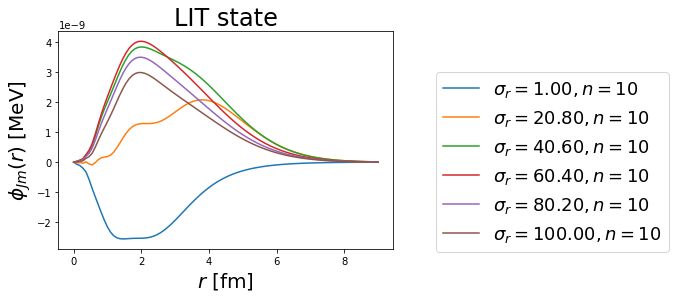

In [62]:
rspace = np.linspace(0,9,100)

wfktJ0 = [[ psiL(rr,1,lit_wrels,np.real(litcoeff)) for rr in rspace ] for litcoeff in litcoeffs ]

plt.subplot(111)
t = plt.title(r'LIT state', fontsize=24)
plt.xlabel(r'$r$ [fm]', fontsize=20)
plt.ylabel(r'$\phi_{Jm}(r)$ [MeV]', fontsize=20)

[ plt.plot(rspace, wfktJ0[wfkt], label='$\sigma_r=%4.2f, n=%d$'%(float(sR[wfkt]),len(lit_wrels))) for wfkt in range(len(wfktJ0)) ]

plt.legend(loc='center left', numpoints=1, fontsize=18, bbox_to_anchor=(1.1, .4))

plt.show()